## ToF Distance Measurement with HH400

## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
from scipy import polyfit

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Define some function¶

In [2]:
# Data generation and filtering
def gen_data_filtering(name0, names, skiprows, filter = None, sel_row = [0], time_res = 1):
    name1 = ''
    for name in names:
        name1 += '_' + str(name)
    data0 = np.loadtxt(name0 + name1 + '.txt', skiprows = skiprows)
    y0 = []
    for i in xrange(len(sel_row)):
        y0.append(data0[:, sel_row[i]])

    leng = int(y0[0].shape[0])

    X = range(leng)
    y = {}

    for i, name in enumerate(names):
        y1 = []
        for j in xrange(leng):
            if filter == None:
                y1 += [X[j] * time_res] * y0[i][j]
            elif X[i] > filter[0] and X[i] < filter[1]:
                y1 += [X[j] * time_res] * y0[i][j]
        y[name] = y1
    return y

# Define No. Counter function
def number_counter(data):
    counter = {}
    for i in xrange(len(data)):
        if float(data[i]) not in counter:
            counter[float(data[i])] = 1
        else:
            counter[float(data[i])] += 1
    return counter

# Define hist_find_max function
def hist_find_max(data1, hist_color='blue', print_out = True, Norm = True):
    plt.hist(data1, bins=bins, normed=Norm, color=hist_color, alpha = alpha)
    counter1 = number_counter(data1)
    results1 = sorted(counter1.items(), key = lambda x: x[1], reverse = True)

    # # Weight average
    count_sum = 0
    for i in xrange(weight_avg_no):
        count_sum += results1[i][1]
        if print_out:
            print 'Rank', i + 1, 'of time1(counts):', results1[i][0], '(%d)' % results1[i][1]
    x1 = 0
    for i in xrange(weight_avg_no):
        x1 += results1[i][0] * results1[i][1] / count_sum
    return x1

# Define hist_kde_fitting function
def hist_kde_fitting(data1, hist_color='blue', fit_color = 'red', Norm = True):
# KDE fit without paramatric bandwidth
    kde1 = sm.nonparametric.KDEUnivariate(data1)
    kde1.fit()
    n1, _, _  = plt.hist(data1, bins=bins, normed=Norm, color=hist_color, alpha = alpha)
    kde1.density = kde1.density / np.max(kde1.density) * np.max(n1)
    plt.plot(kde1.support, kde1.density, lw=2, color = fit_color)
    # # find max
    return kde1.support[np.argmax(kde1.density)]

## Parameters

In [3]:
bins = 1000
alpha = 0.5
weight_avg_no = 1 # Return max time if set weight_avg_no = 1 
time_resolution = 0.016

## Different biased VDD

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


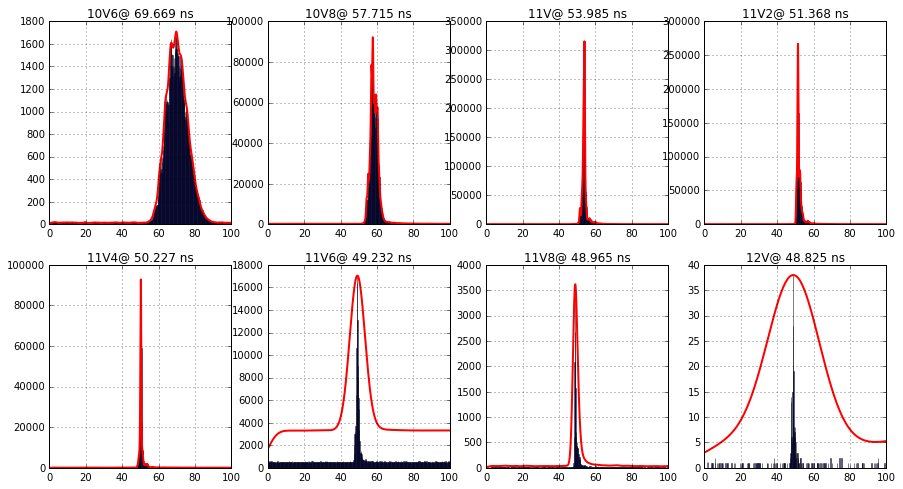

In [4]:
file_name1 = [['10V6', '10V8'], ['11V', '11V2'], ['11V4', '11V6'], ['11V8', '12V']]
data1 = {}
for name in file_name1:
    data0 = gen_data_filtering('./data/5M_5_10mv', name, skiprows=10, sel_row = [0, 4], time_res = time_resolution)
    data1 = dict(data1.items() + data0.items())
i = 1
for name1 in file_name1:
    for name2 in name1:
        plt.subplot(2, 4, i)
        x1 = hist_kde_fitting(data1[name2], Norm = False)
        plt.title(name2 + '@ %.3f ns' % x1)
        plt.grid(True)
        plt.xlim(0, 100)
        # plt.ylim(0, 50000)
        i += 1

## Different light intensity

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


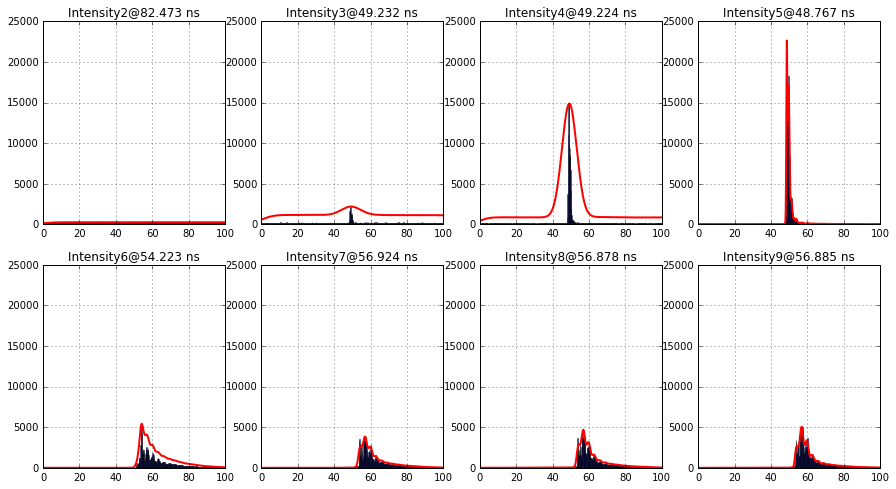

In [5]:
file_name4 = [['2', '3'], ['4', '5'], ['6', '7'], ['8', '9']]
data4 = {}
for name in file_name4:
    data0 = gen_data_filtering('./data/5M_11V6_10mv', name, skiprows=10, sel_row = [0, 4], time_res = time_resolution)
    data4 = dict(data4.items() + data0.items())
i = 1
for name1 in file_name4:
    for name2 in name1:
        plt.subplot(2, 4, i)
        x1 = hist_kde_fitting(data4[name2], Norm = False)
        plt.title('Intensity' + name2 + '@%.3f ns' %x1)
        plt.grid(True)
        plt.xlim(0, 100)
        plt.ylim(0, 25000)
        i += 1

## Different light intensity under strong noise

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


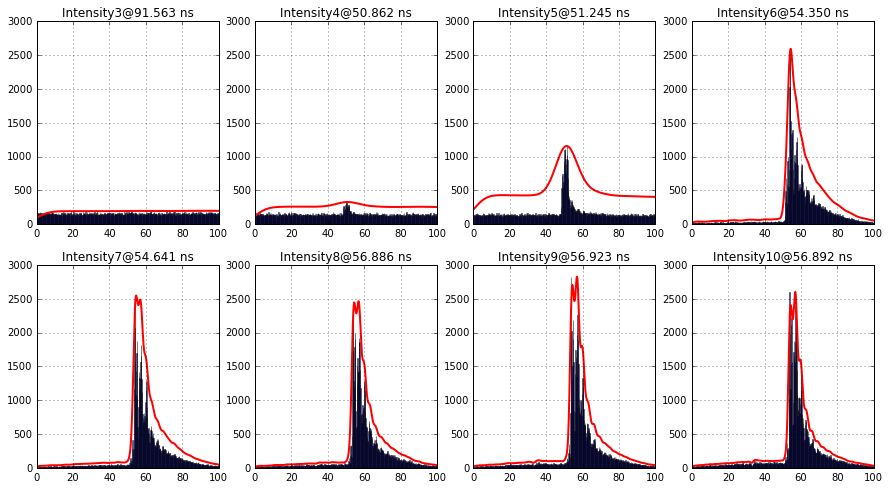

In [6]:
file_name6 = [['3', '4'], ['5', '6'], ['7', '8'], ['9', '10']]
data6 = {}
for name in file_name6:
    data0 = gen_data_filtering('./data/5M_11V6_10mv_noise', name, skiprows=10, sel_row = [0, 4], time_res = time_resolution)
    data6 = dict(data6.items() + data0.items())
i = 1
for name1 in file_name6:
    for name2 in name1:
        plt.subplot(2, 4, i)
        x1 = hist_kde_fitting(data6[name2], Norm = False)
        plt.title('Intensity' + name2 + '@%.3f ns' %x1)
        plt.grid(True)
        plt.xlim(0, 100)
        plt.ylim(0, 3000)
        i += 1

## Before and after strong light

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


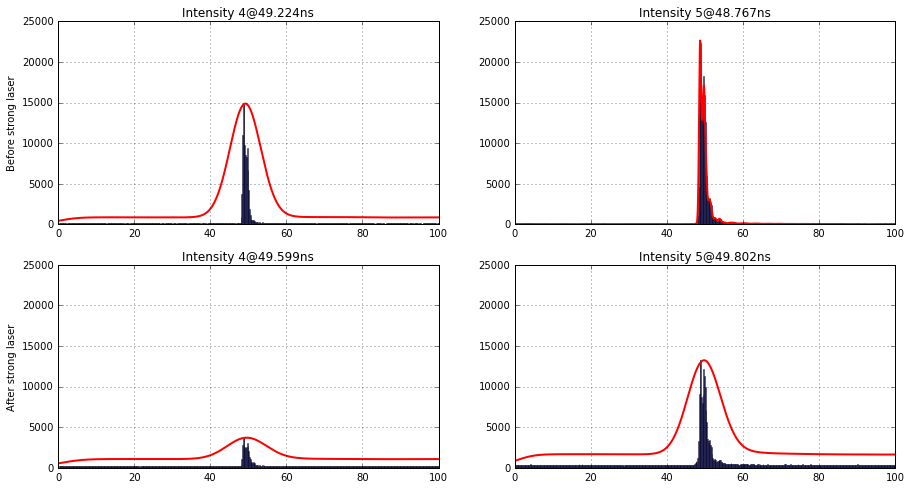

In [7]:
file_name5 = [['4', '5']]
data5 = {}
for name in file_name5:
    data0 = gen_data_filtering('./data/5M_11V6_10mv_after_strong_light', name, skiprows=10, sel_row = [0, 4], time_res = time_resolution)
    data5 = dict(data5.items() + data0.items())
    
# Before strong light
plt.subplot(2, 2, 1)
x1 = hist_kde_fitting(data4['4'], Norm = False)
plt.title('Intensity 4' + '@%.3fns' %x1)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 25000)
plt.ylabel('Before strong light')

plt.subplot(2, 2, 2)
x1 = hist_kde_fitting(data4['5'], Norm = False)
plt.title('Intensity 5' + '@%.3fns' %x1)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 25000)

# After strong light
plt.subplot(2, 2, 3)
x1 = hist_kde_fitting(data5['4'], Norm = False)
plt.title('Intensity 4' + '@%.3fns' %x1)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 25000)
plt.ylabel('After strong light')

plt.subplot(2, 2, 4)
x1 = hist_kde_fitting(data5['5'], Norm = False)
plt.title('Intensity 5' + '@%.3fns' %x1)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 25000)

plt.show()

## Different biased VDD with strong noise

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


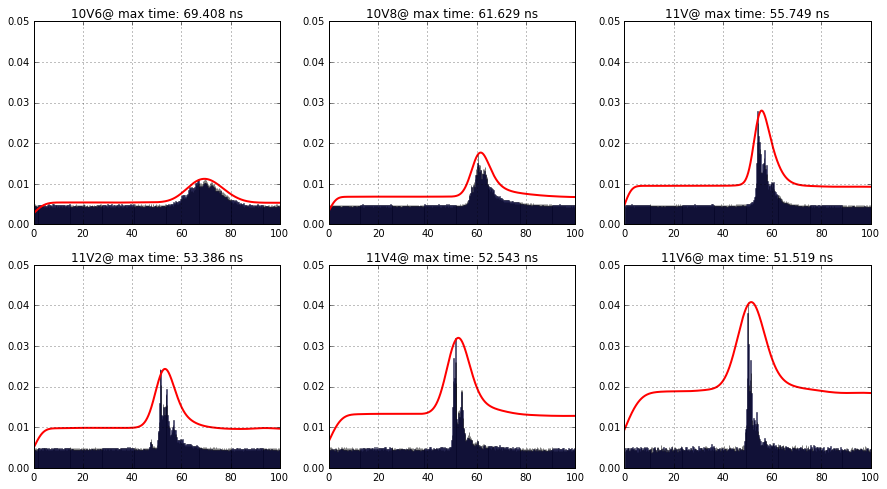

In [8]:
file_name2 = [['10V6', '10V8'], ['11V', '11V2'], ['11V4', '11V6']]
data2 = {}
for name in file_name2:
    data0 = gen_data_filtering('./data/5M_5_10mv_noise', name, skiprows=10, sel_row = [0, 4], time_res = time_resolution)
    data2 = dict(data2.items() + data0.items())
i = 1
for name1 in file_name2:
    for name2 in name1:
        plt.subplot(2, 3, i)
        x1 = hist_kde_fitting(data2[name2], Norm = True)
        plt.title(name2 + '@ max time: %.3f ns' %x1)
        plt.grid(True)
        plt.xlim(0, 100)
        plt.ylim(0, 0.05)
        i += 1

## Different compare voltage Vcmp with strong noise

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


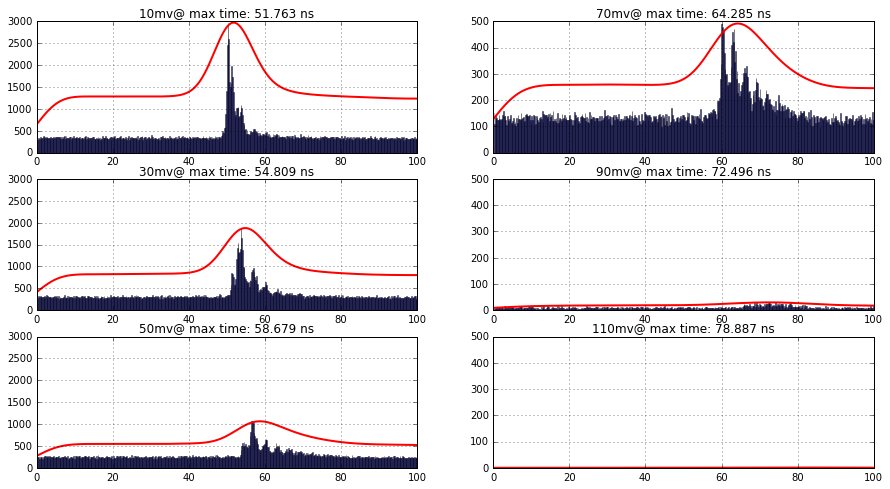

In [9]:
file_name3 = [['10mv', '30mv'], ['50mv', '70mv'], ['90mv', '110mv']]
data3 = {}
for name in file_name3:
    data0 = gen_data_filtering('./data/5M_5_11V5_noise', name, skiprows=10, sel_row = [0, 4], time_res = time_resolution)
    data3 = dict(data3.items() + data0.items())
i = 1
for name1 in file_name3:
    for name2 in name1:
        if i < 4:
            plt.subplot(3,2,(i - 1) * 2 + 1)
        else:
            plt.subplot(3,2,(i - 3) * 2)
        x1 = hist_kde_fitting(data3[name2], Norm = False)
        plt.title(name2 + '@ max time: %.3f ns' %x1)
        plt.grid(True)
        plt.xlim(0, 100)
        if i < 4:
            plt.ylim(0, 3000)
        else:
            plt.ylim(0, 500)
        i += 1